# 1 Importar librerias y data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Cargar el CSV en un dataframe
df = pd.read_csv('../data/EloRatings.csv')
df_1 = pd.read_csv('../data/Matches.csv')

/tmp/ipykernel_3332/562527281.py:3: DtypeWarning: Columns (0: MatchTime) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('../data/Matches.csv')


In [35]:
# Ver las primeras filas del dataframe
df.head(20)

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43
5,2000-07-01,Adanaspor,TUR,1380.76
6,2000-07-01,AEK,GRE,1599.31
7,2000-07-01,AIK,SWE,1563.87
8,2000-07-01,Ajaccio,FRA,1470.87
9,2000-07-01,Ajax,NED,1604.75


In [36]:
# Verificar que se toman los elos como describe el dataset 
valencia_snapshots = df[df['club'] == 'Valencia']
print(f"Se encontraron {len(valencia_snapshots)} registros del Valencia.")
valencia_snapshots.head()

Se encontraron 599 registros del Valencia.


,date,club,country,elo
370,2000-07-01,Valencia,ESP,1904.36
771,2000-07-15,Valencia,ESP,1904.36
1170,2000-08-01,Valencia,ESP,1904.36
1569,2000-08-15,Valencia,ESP,1903.24
1968,2000-09-01,Valencia,ESP,1907.14


In [37]:
# Ver tamaño del primer dataframe
df.shape

(245033, 4)

In [38]:
# Información de las variables
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 245033 entries, 0 to 245032
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     245033 non-null  str    
 1   club     245033 non-null  str    
 2   country  245033 non-null  str    
 3   elo      245033 non-null  float64
dtypes: float64(1), str(3)
memory usage: 7.5 MB


In [39]:
df_1.head(40)

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F1,2000-07-29,NaN,Guingamp,St Etienne,1578.51,1620.74,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F1,2000-07-29,NaN,Lille,Monaco,1630.81,1778.03,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,F1,2000-07-29,NaN,Lyon,Rennes,1702.60,1644.99,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,F1,2000-07-29,NaN,Nantes,Lens,1664.36,1730.89,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,F1,2000-07-29,NaN,Toulouse,Bastia,1551.65,1656.37,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Tamaño de segundo dataframe
df_1.shape

(230557, 48)

In [41]:
# Información segundo dataframe
df_1.info()

<class 'pandas.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  str    
 1   MatchDate    230557 non-null  str    
 2   MatchTime    99072 non-null   str    
 3   HomeTeam     230557 non-null  str    
 4   AwayTeam     230557 non-null  str    
 5   HomeElo      141597 non-null  float64
 6   AwayElo      141528 non-null  float64
 7   Form3Home    229057 non-null  float64
 8   Form5Home    229057 non-null  float64
 9   Form3Away    229057 non-null  float64
 10  Form5Away    229057 non-null  float64
 11  FTHome       230554 non-null  float64
 12  FTAway       230554 non-null  float64
 13  FTResult     230554 non-null  str    
 14  HTHome       175977 non-null  float64
 15  HTAway       175977 non-null  float64
 16  HTResult     175977 non-null  str    
 17  HomeShots    114735 non-null  float64
 18  AwayShots    114738 non-null  float

# 2 Cribado manual del dataframe

## 2.1 Valores únicos

In [42]:
# Visualizar si hay columnas con un valor unico multiplicado
unicos = df.nunique()
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
245028
245029
245030
245031


In [43]:
# Visualizar si hay columnas con un valor unico multiplicado
unicos_1 = df_1.nunique()
df_1[unicos[unicos==1].index]

""
0
1
2
3
4
...
230552
230553
230554
230555


## 2.2 Filas duplicadas

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df_1.duplicated().sum()

np.int64(0)

## 2.3 Columnas duplicadas

In [46]:
df.T.duplicated().sum()

np.int64(0)

In [47]:
df_1.T.duplicated().sum()

np.int64(0)

## 2.4 Data leakage  
Nuestro modelo se centrará en predecir resultados de partidos, por lo que los datos que ocurren durante el partido deberán eliminarse, de esta forma evitamos la fuga de datos.

In [48]:
# Lista maestra de variables a eliminar (Estadísticas In-Game / Post-Partido)
cols_to_drop = [
    # Marcadores y Goles
    'FTHome', 'FTAway', 'HTHome', 'HTAway', 'HTResult', 'TotalGoals',
    
    # Estadísticas de Juego (Live)
    'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
    'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
    
    # Diferenciales y Totales del partido actual
    'CornersDifference', 'CornersTotal', 'ShotsDifference', 'ShotsTotal',
    
    # Clusters y Dominio del encuentro
    'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB', 'GameDominanceIndex',
    
    # Índices de eficiencia y tarjetas del partido actual
    'CardPointsHome', 'CardPointsAway', 'CardPointsDiff',
    'ShotAccuracyHome', 'ShotAccuracyAway', 'ShotAccuracyDiff',
    'ScoringEfficiencyHome', 'ScoringEfficiencyAway',
    'DefensiveRatingHome', 'DefensiveRatingAway',
    'CleanSheetProbHome', 'CleanSheetProbAway',
    'ExpectedGoalsHome', 'ExpectedGoalsAway'
]

# Usamos errors='ignore' para que no de error si alguna columna ya fue borrada
df_1 = df_1.drop(columns=cols_to_drop, errors='ignore')

print(f"✅ Limpieza finalizada. Columnas restantes: {len(df_1.columns)}")

✅ Limpieza finalizada. Columnas restantes: 25


In [49]:
df_1.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.5 Valores NaN

In [50]:
df.isna().sum()

date       0
club       0
country    0
elo        0
dtype: int64

<Axes: >

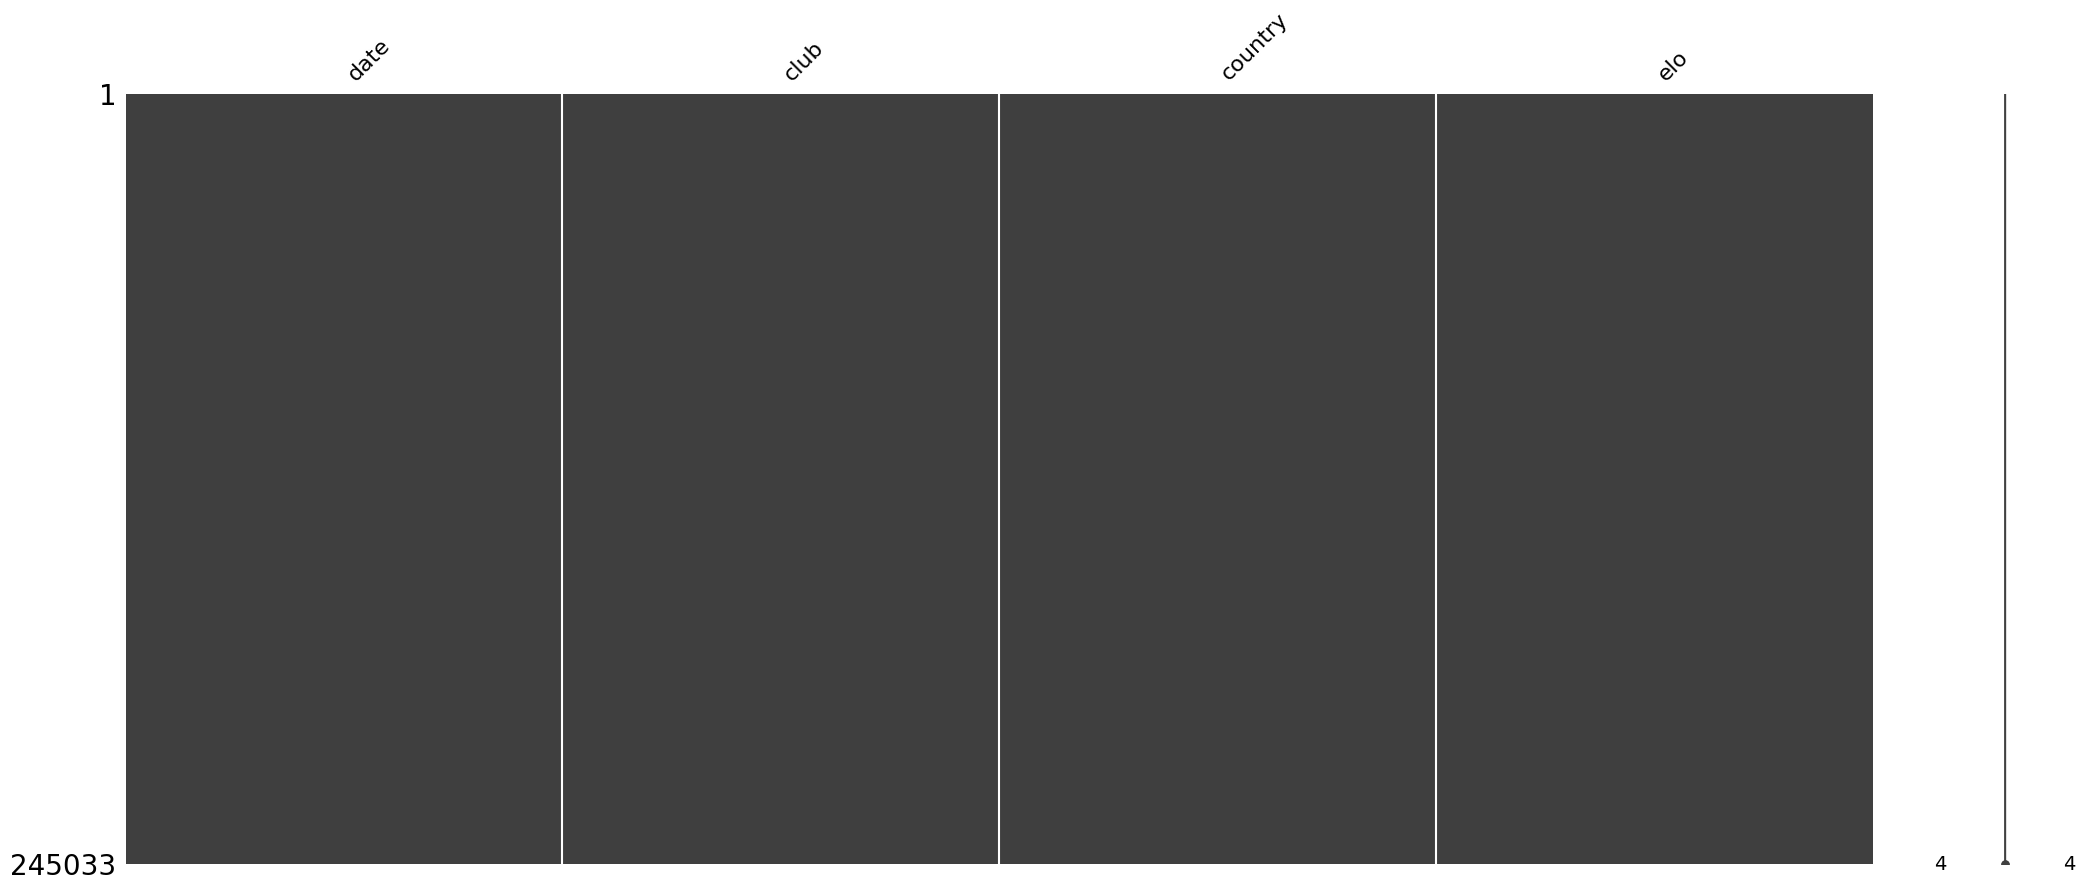

In [51]:
msno.matrix(df)

In [52]:
df_1.isna().sum()

Division           0
MatchDate          0
MatchTime     131485
HomeTeam           0
AwayTeam           0
HomeElo        88960
AwayElo        89029
Form3Home       1500
Form5Home       1500
Form3Away       1500
Form5Away       1500
FTResult           3
OddHome         3030
OddDraw         3030
OddAway         3030
MaxHome        27635
MaxDraw        27635
MaxAway        27635
Over25         82159
Under25        82160
MaxOver25      82159
MaxUnder25     82160
HandiSize      73824
HandiHome      74082
HandiAway      74106
dtype: int64

In [53]:
porcentaje_nulos = (df_1.isna().sum() / len(df_1)) * 100

print(porcentaje_nulos)

Division       0.000000
MatchDate      0.000000
MatchTime     57.029281
HomeTeam       0.000000
AwayTeam       0.000000
HomeElo       38.584819
AwayElo       38.614746
Form3Home      0.650598
Form5Home      0.650598
Form3Away      0.650598
Form5Away      0.650598
FTResult       0.001301
OddHome        1.314209
OddDraw        1.314209
OddAway        1.314209
MaxHome       11.986190
MaxDraw       11.986190
MaxAway       11.986190
Over25        35.635006
Under25       35.635439
MaxOver25     35.635006
MaxUnder25    35.635439
HandiSize     32.019848
HandiHome     32.131750
HandiAway     32.142160
dtype: float64


<Axes: >

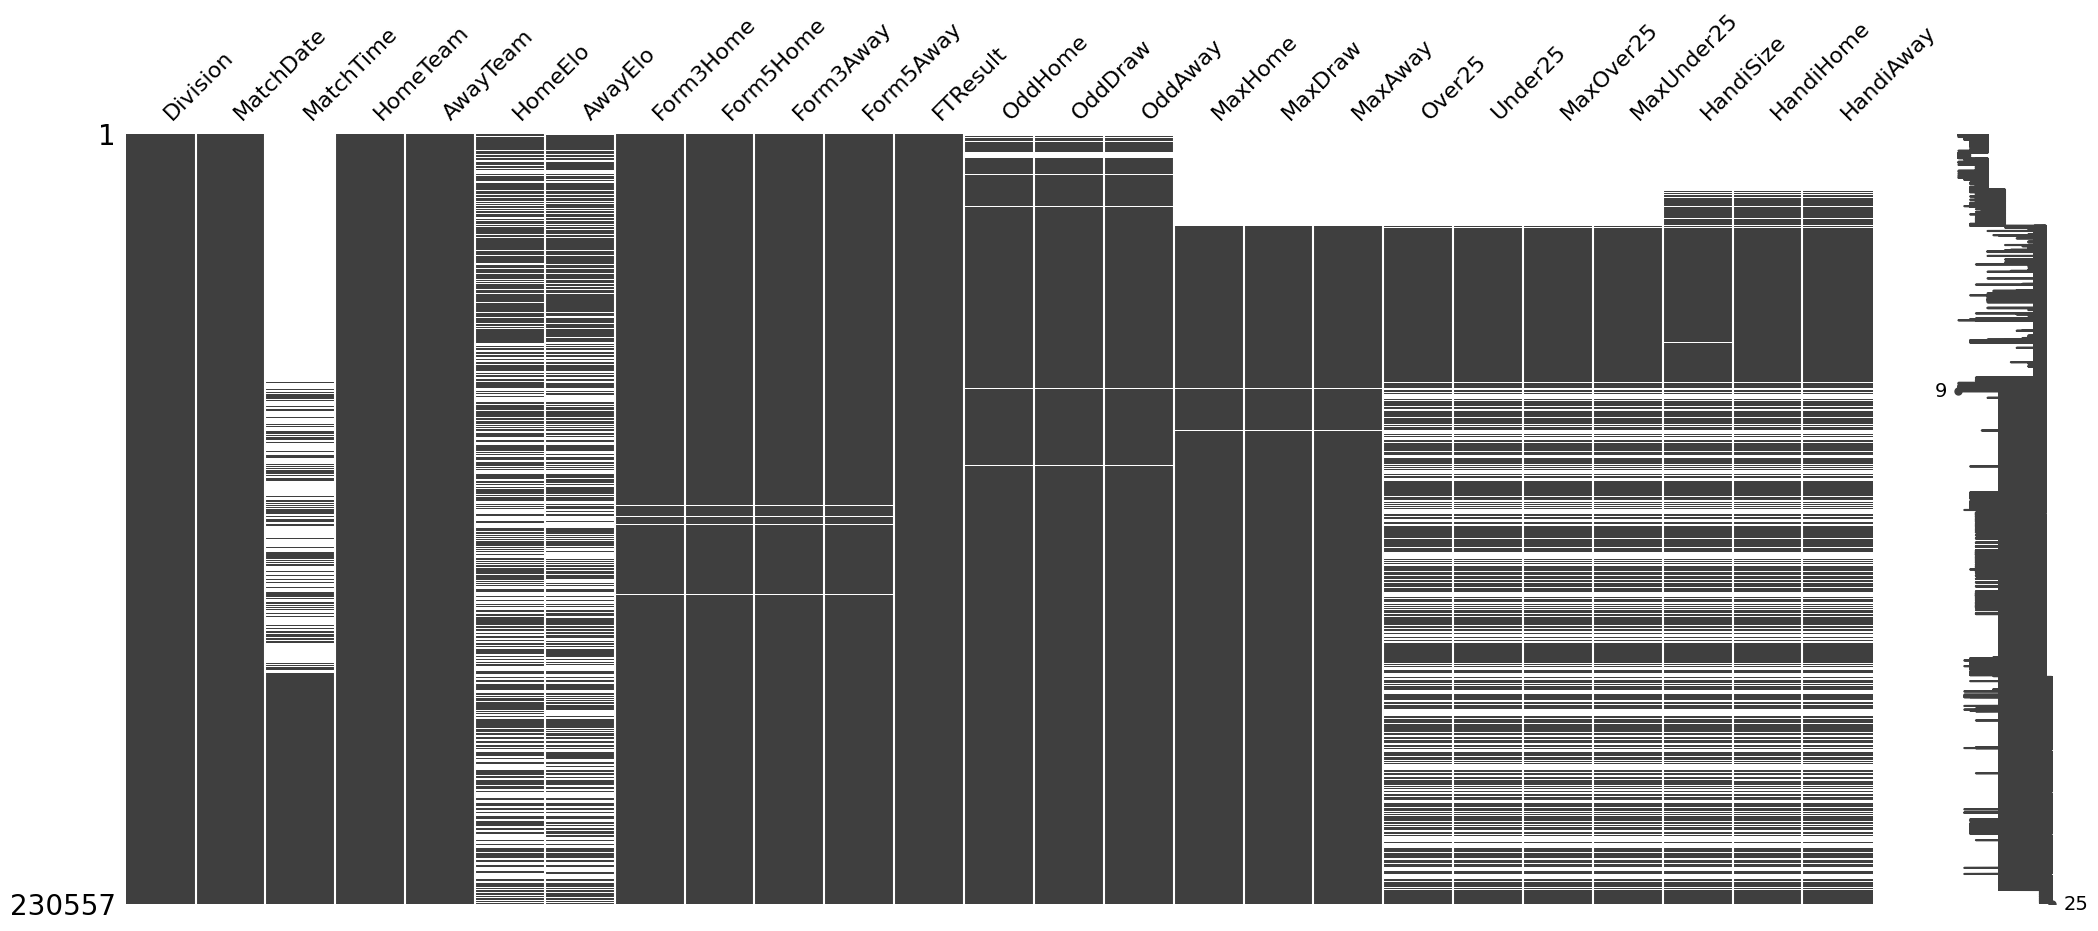

In [54]:
msno.matrix(df_1)

In [55]:
print(df_1['MatchTime'].dropna())

73304     03:00:00
73305     03:00:00
73306     04:00:00
73307     13:00:00
73308     16:30:00
            ...   
230552    17:30:00
230553    17:30:00
230554    17:30:00
230555    17:30:00
230556    20:00:00
Name: MatchTime, Length: 99072, dtype: str


### Dado el alto número de datos faltantes de la columna MatchTime se la decide borrar por verse inviable su inputación

In [56]:
df_1 = df_1.drop(columns=['MatchTime'], errors='ignore')
print("✅ Columna 'MatchTime' (50% NaNs) eliminada.")

✅ Columna 'MatchTime' (50% NaNs) eliminada.


## 2.6 Combinación de tablas

In [62]:
# --- Normalización de strings ---
df_1['HomeTeam'] = df_1['HomeTeam'].str.strip()
df_1['AwayTeam'] = df_1['AwayTeam'].str.strip()
df['club'] = df['club'].str.strip()

# --- Fechas ---
df_1['MatchDate'] = pd.to_datetime(df_1['MatchDate'])
df['date'] = pd.to_datetime(df['date'])

# --- Orden obligatorio para merge_asof ---
df_1 = df_1.sort_values('MatchDate')
df = df.sort_values('date')

In [65]:
# ===== LOCALES =====
df_home = (
    df[['date', 'club', 'elo']]
    .rename(columns={
        'date': 'MatchDate',
        'club': 'HomeTeam',
        'elo': 'elo_home'
    })
    .sort_values('MatchDate')
)

df_1 = pd.merge_asof(
    df_1,
    df_home,
    on='MatchDate',
    by='HomeTeam',
    direction='backward'
)

# ===== VISITANTES =====
df_away = (
    df[['date', 'club', 'elo']]
    .rename(columns={
        'date': 'MatchDate',
        'club': 'AwayTeam',
        'elo': 'elo_away'
    })
    .sort_values('MatchDate')
)

df_1 = pd.merge_asof(
    df_1,
    df_away,
    on='MatchDate',
    by='AwayTeam',
    direction='backward'
)

In [66]:
# --- Relleno seguro ---
df_1['HomeElo'] = df_1['HomeElo'].fillna(df_1['elo_home'])
df_1['AwayElo'] = df_1['AwayElo'].fillna(df_1['elo_away'])

# --- Limpieza ---
df_1 = df_1.drop(columns=['elo_home', 'elo_away'], errors='ignore')

print("✅ Pipeline completado correctamente (sin country).")
print(f"Nulos HomeElo: {df_1['HomeElo'].isnull().sum()}")
print(f"Nulos AwayElo: {df_1['AwayElo'].isnull().sum()}")

✅ Pipeline completado correctamente (sin country).
Nulos HomeElo: 78337
Nulos AwayElo: 78370


<Axes: >

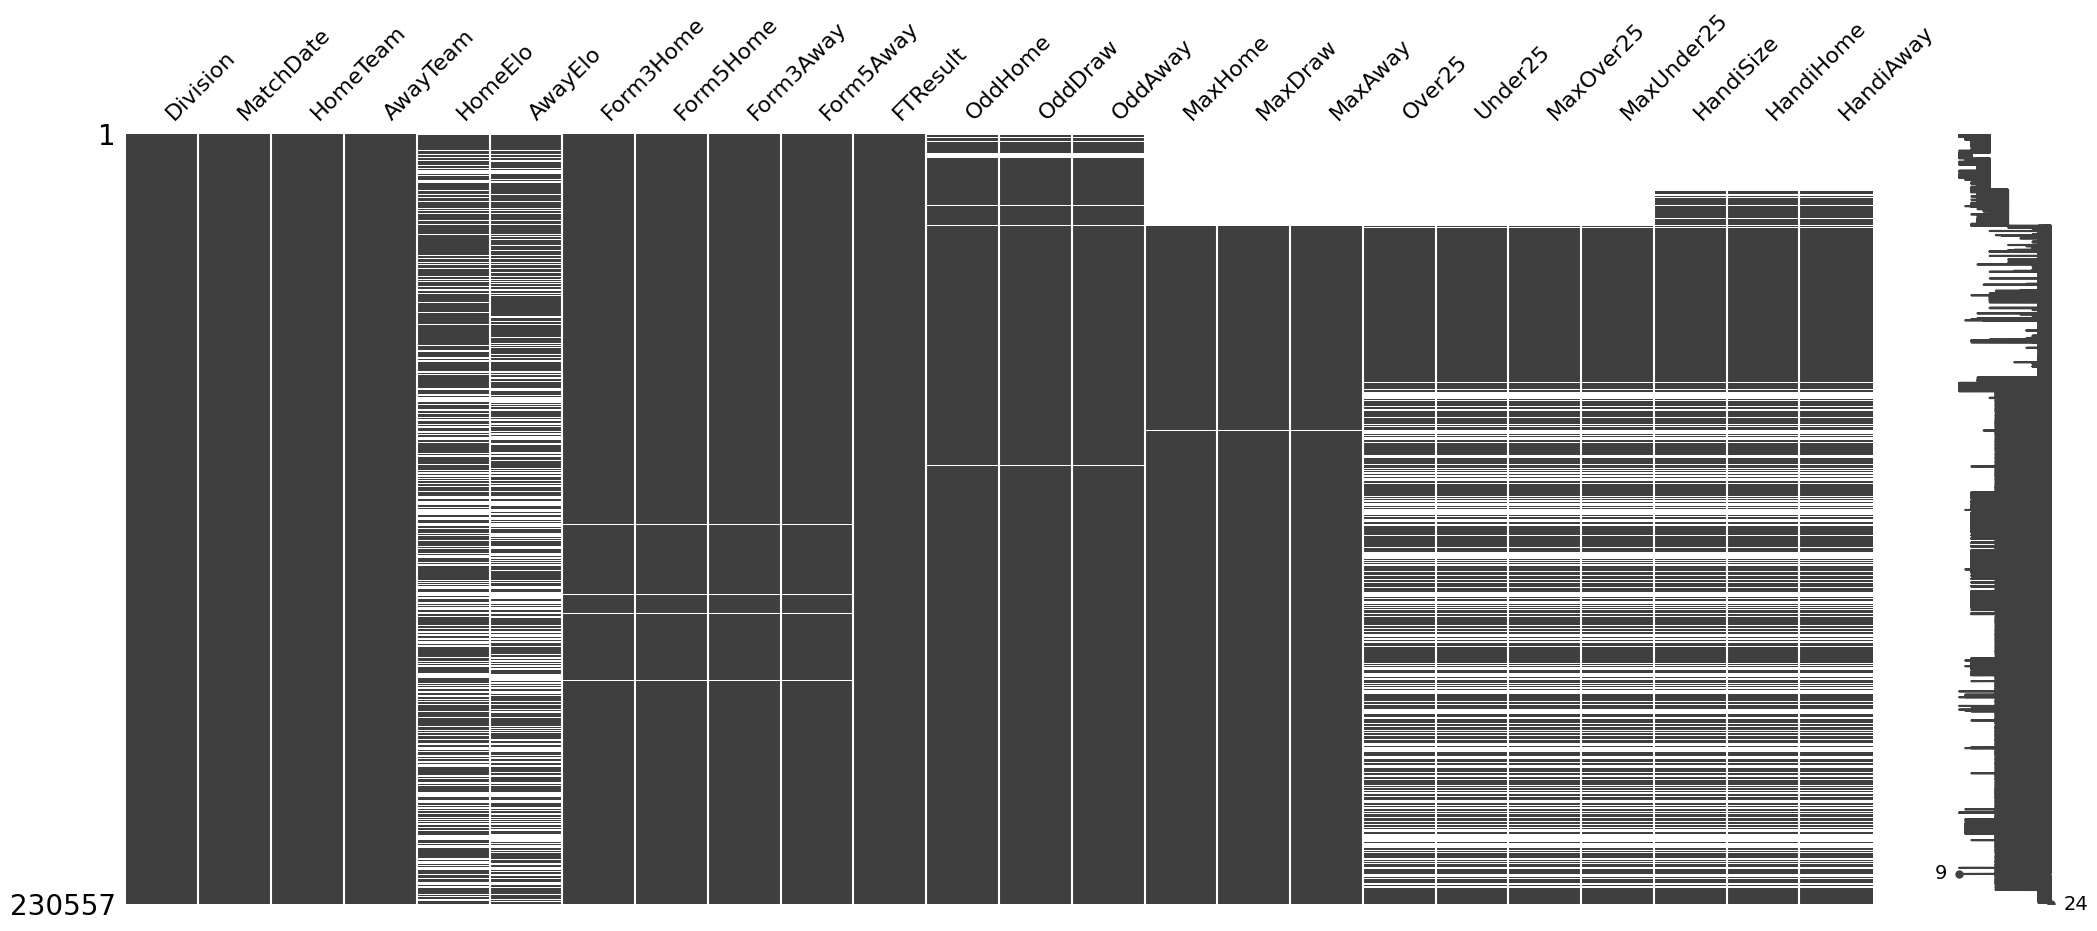

In [67]:
msno.matrix(df_1)

In [68]:
porcentaje_nulos = (df_1.isna().sum() / len(df_1)) * 100

print(porcentaje_nulos)

Division       0.000000
MatchDate      0.000000
HomeTeam       0.000000
AwayTeam       0.000000
HomeElo       33.977281
AwayElo       33.991594
Form3Home      0.650598
Form5Home      0.650598
Form3Away      0.650598
Form5Away      0.650598
FTResult       0.001301
OddHome        1.314209
OddDraw        1.314209
OddAway        1.314209
MaxHome       11.986190
MaxDraw       11.986190
MaxAway       11.986190
Over25        35.635006
Under25       35.635439
MaxOver25     35.635006
MaxUnder25    35.635439
HandiSize     32.019848
HandiHome     32.131750
HandiAway     32.142160
dtype: float64


In [69]:
# Ver los 20 equipos que más nulos están generando
equipos_con_mas_nulos = df_1[df_1['HomeElo'].isnull()]['HomeTeam'].value_counts().head(20)
print("Equipos con mas NaNs:")
print(equipos_con_mas_nulos)

Equipos con mas NaNs:
HomeTeam
Bristol Rvs      553
Notts County     553
Northampton      552
Oldham           536
Leyton Orient    534
Lincoln          532
Cheltenham       532
Chesterfield     529
Rochdale         515
Carlisle         515
Hartlepool       514
Shrewsbury       513
Plymouth         488
Wrexham          481
Mansfield        464
Wycombe          440
Oxford           436
Barnet           436
Accrington       431
Exeter           425
Name: count, dtype: int64


In [70]:
# 1. Obtenemos los nombres únicos de ambas tablas
nombres_en_grande = set(df_1['HomeTeam'].unique())
nombres_en_pequeña = set(df['club'].unique())

# 2. Encontramos quiénes están en la grande pero NO en la pequeña
faltantes = nombres_en_grande - nombres_en_pequeña

# 3. Vemos cuántas filas (partidos) están afectando estos equipos específicos
equipos_reales_faltantes = df_1[df_1['HomeTeam'].isin(faltantes)]['HomeTeam'].value_counts().head(20)

print(f"Total de equipos en df_1 que no existen en df: {len(faltantes)}")
print("\nTop 20 equipos responsables de los nulos y cuántos partidos afectan:")
print(equipos_reales_faltantes)

Total de equipos en df_1 que no existen en df: 508

Top 20 equipos responsables de los nulos y cuántos partidos afectan:
HomeTeam
Bristol Rvs      553
Notts County     553
Northampton      552
Oldham           536
Leyton Orient    534
Lincoln          532
Cheltenham       532
Chesterfield     529
Rochdale         515
Carlisle         515
Hartlepool       514
Shrewsbury       513
Wrexham          481
Mansfield        464
Barnet           436
Accrington       431
Exeter           425
Bury             420
Macclesfield     418
Cambridge        416
Name: count, dtype: int64


## 3. Imputación